# Vou utilizar alguns indices junto com o valor da moeda para fazer a previsão

Indices iniciais para teste:

- Nasdaq Crypto Index - OK
- Crypto Fear & Greed Index - OK
- CRYPTO 10 INDEX - NOK 
- Fear & Greed Index - NOK
- Nasdaq index - OK
- World Uncertainty Index - WUI - NOK
- Crypto Volatility Index (CVI) - NOK
- CBOE Volatility Index - VIX - OK
- Total Crypto Market Capitalization
- Crypto Adoption Index by Chainalysis - NOK
- Altcoin Index (Altcoin Market Cap) - NOK

- BITCOIN
  

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

## Bitcoin

In [2]:
btc_data = yf.download('BTC-USD', start=None, end=None)


[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'BTC Price'}, xlabel='Date'>

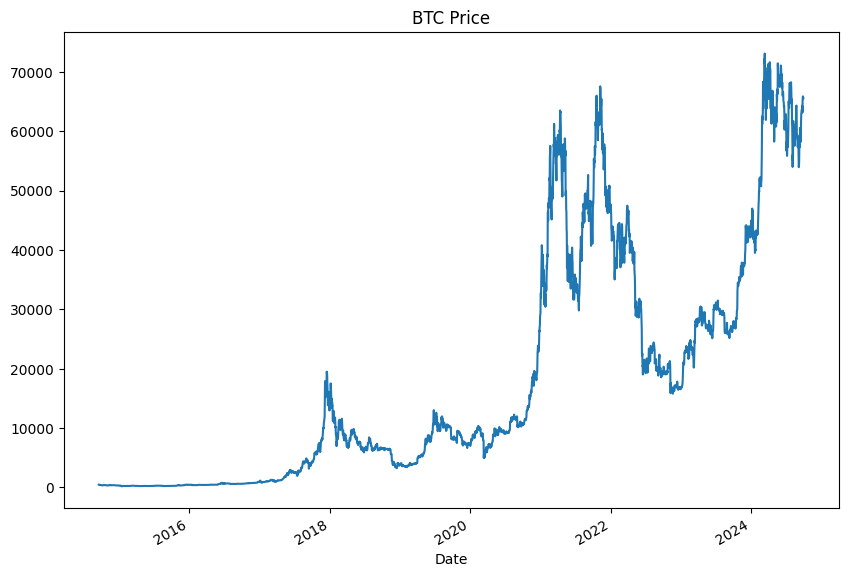

In [3]:
btc_data['Close'].plot(title='BTC Price', figsize=(10, 7))

## Nasdaq Crypto Index e Nasdaq Index

In [4]:
nasdaq_data = yf.download('NDAQ', start=None, end=None)


[*********************100%***********************]  1 of 1 completed


In [5]:
nasdaq_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,5.000000,5.000000,5.000000,5.000000,4.078878,3900
2002-07-02,5.166667,5.500000,5.000000,5.043333,4.114228,21000
2002-07-03,4.666667,5.333333,4.666667,5.000000,4.078878,30600
2002-07-05,5.000000,5.000000,5.000000,5.000000,4.078878,1500
2002-07-08,4.666667,4.666667,4.666667,4.666667,3.806951,900
...,...,...,...,...,...,...
2024-09-23,74.709999,74.879997,73.889999,74.010002,74.010002,2546000
2024-09-24,73.870003,73.870003,73.139999,73.669998,73.669998,2408200
2024-09-25,73.669998,73.940002,72.680000,73.040001,73.040001,3428900


In [6]:
nasdaq_crypto_data = yf.download('HASH11.SA', start=None, end=None)

[*********************100%***********************]  1 of 1 completed


In [7]:
nasdaq_crypto_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-26,52.000000,56.700001,49.849998,53.099998,53.099998,3097359
2021-04-27,54.450001,58.000000,50.779999,51.660000,51.660000,2765371
2021-04-28,51.700001,51.980000,50.500000,51.599998,51.599998,814484
2021-04-29,51.290001,51.290001,49.450001,49.450001,49.450001,934530
2021-04-30,50.529999,53.000000,50.060001,52.650002,52.650002,733115
...,...,...,...,...,...,...
2024-09-23,50.349998,50.889999,50.099998,50.360001,50.360001,353216
2024-09-24,50.220001,50.320000,49.189999,49.849998,49.849998,348273
2024-09-25,49.970001,50.270000,49.400002,49.500000,49.500000,238985


## Crypto Fear & Greed Index

In [8]:
import requests

dias = 1490

url = f"https://api.alternative.me/fng/?limit={dias}&date_format=world"
response = requests.get(url)
data = response.json()

print(data['data']) 


[{'value': '61', 'value_classification': 'Greed', 'timestamp': '30-09-2024', 'time_until_update': '-1727568899'}, {'value': '63', 'value_classification': 'Greed', 'timestamp': '29-09-2024'}, {'value': '64', 'value_classification': 'Greed', 'timestamp': '28-09-2024'}, {'value': '61', 'value_classification': 'Greed', 'timestamp': '27-09-2024'}, {'value': '50', 'value_classification': 'Neutral', 'timestamp': '26-09-2024'}, {'value': '59', 'value_classification': 'Greed', 'timestamp': '25-09-2024'}, {'value': '54', 'value_classification': 'Neutral', 'timestamp': '24-09-2024'}, {'value': '50', 'value_classification': 'Neutral', 'timestamp': '23-09-2024'}, {'value': '52', 'value_classification': 'Neutral', 'timestamp': '22-09-2024'}, {'value': '54', 'value_classification': 'Neutral', 'timestamp': '21-09-2024'}, {'value': '54', 'value_classification': 'Neutral', 'timestamp': '20-09-2024'}, {'value': '49', 'value_classification': 'Neutral', 'timestamp': '19-09-2024'}, {'value': '45', 'value_cl

In [9]:
# Transformar em df

crypto_fear_greed_index = pd.DataFrame(data['data'])

In [10]:
crypto_fear_greed_index.drop('time_until_update', axis=1, inplace=True)

In [11]:
crypto_fear_greed_index

,value,value_classification,timestamp
0,61,Greed,30-09-2024
1,63,Greed,29-09-2024
2,64,Greed,28-09-2024
3,61,Greed,27-09-2024
4,50,Neutral,26-09-2024
...,...,...,...
1485,41,Fear,06-09-2020
1486,41,Fear,05-09-2020
1487,40,Fear,04-09-2020
1488,79,Extreme Greed,03-09-2020


In [12]:
crypto_fear_greed_index.columns = ['Value', 'Value_categorical', 'Date']

In [13]:
crypto_fear_greed_index

,Value,Value_categorical,Date
0,61,Greed,30-09-2024
1,63,Greed,29-09-2024
2,64,Greed,28-09-2024
3,61,Greed,27-09-2024
4,50,Neutral,26-09-2024
...,...,...,...
1485,41,Fear,06-09-2020
1486,41,Fear,05-09-2020
1487,40,Fear,04-09-2020
1488,79,Extreme Greed,03-09-2020


In [14]:
# Trasnformar a coluna de date no index

crypto_fear_greed_index['Date'] = pd.to_datetime(crypto_fear_greed_index['Date'])

crypto_fear_greed_index.set_index('Date', inplace=True)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_17768\2125246770.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  crypto_fear_greed_index['Date'] = pd.to_datetime(crypto_fear_greed_index['Date'])


In [15]:
crypto_fear_greed_index['Value'] = pd.to_numeric(crypto_fear_greed_index['Value'])

In [16]:
crypto_fear_greed_index

,Value,Value_categorical
Date,,
2024-09-30,61,Greed
2024-09-29,63,Greed
2024-09-28,64,Greed
2024-09-27,61,Greed
2024-09-26,50,Neutral
...,...,...
2020-09-06,41,Fear
2020-09-05,41,Fear
2020-09-04,40,Fear


## BOE Volatility Index

In [27]:
# VIX
vix_index = yf.download('^VIX', start=None, end=None)

vix_index


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0
...,...,...,...,...,...,...
2024-09-23,16.709999,16.950001,15.750000,15.890000,15.890000,0
2024-09-24,15.870000,16.670000,15.270000,15.390000,15.390000,0
2024-09-25,15.820000,15.820000,15.170000,15.410000,15.410000,0


## Solana Data

In [26]:
sol_data = yf.download('SOL-USD', start=None, end=None)

[*********************100%***********************]  1 of 1 completed


In [28]:
sol_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...
2024-09-25,152.890961,153.547638,147.450134,148.023422,148.023422,2138602628
2024-09-26,148.021103,157.858154,146.870758,155.576096,155.576096,3009969111
2024-09-27,155.576096,160.981400,154.130280,157.749939,157.749939,2765830721


# Analise de dados geral

In [20]:
# # Normalizasr todos os dados
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# btc_data['Close'] = scaler.fit_transform(btc_data[['Close']])
# nasdaq_data['Close'] = scaler.fit_transform(nasdaq_data[['Close']])
# nasdaq_crypto_data['Close'] = scaler.fit_transform(nasdaq_crypto_data[['Close']])
# crypto_fear_greed_index['Value'] = scaler.fit_transform(crypto_fear_greed_index[['Value']])
# vix_index['Close'] = scaler.fit_transform(vix_index[['Close']])
# sol_data['Close'] = scaler.fit_transform(sol_data[['Close']])


# Preparação dos dados para o modelo

In [29]:
# Criar df com toodos os dados e  o date como index

df_feat = pd.DataFrame({
    'BTC Price': btc_data['Close'],
    'Nasdaq Price': nasdaq_data['Close'],
    'Nasdaq Crypto Price': nasdaq_crypto_data['Close'],
    'Crypto Fear & Greed Index': crypto_fear_greed_index['Value'],
    'VIX Index': vix_index['Close'],
    'Solana Price': sol_data['Close']
})

In [30]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,17.240000,NaN
1990-01-03,NaN,NaN,NaN,NaN,18.190001,NaN
1990-01-04,NaN,NaN,NaN,NaN,19.219999,NaN
1990-01-05,NaN,NaN,NaN,NaN,20.110001,NaN
1990-01-08,NaN,NaN,NaN,NaN,20.260000,NaN
...,...,...,...,...,...,...
2024-09-26,65181.019531,72.559998,50.290001,50.0,15.370000,155.576096
2024-09-27,65790.664062,72.599998,51.209999,61.0,16.959999,157.749939
2024-09-28,65887.648438,NaN,NaN,64.0,NaN,156.912430


In [31]:
print(sol_data.index.min())
print(btc_data.index.min())
print(nasdaq_data.index.min())
print(nasdaq_crypto_data.index.min())
print(crypto_fear_greed_index.index.min())
print(vix_index.index.min())


2020-04-10 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
1990-01-02 00:00:00


In [32]:
# Filtrar todos os dados para começar a data 2021-04-26

sol_data = sol_data.loc[sol_data.index >= '2021-04-26']
btc_data = btc_data.loc[btc_data.index >= '2021-04-26']
nasdaq_data = nasdaq_data.loc[nasdaq_data.index >= '2021-04-26']
nasdaq_crypto_data = nasdaq_crypto_data.loc[nasdaq_crypto_data.index >= '2021-04-26']
crypto_fear_greed_index = crypto_fear_greed_index.loc[crypto_fear_greed_index.index >= '2021-04-26']
vix_index = vix_index.loc[vix_index.index >= '2021-04-26']


In [33]:
print(sol_data.index.min())
print(btc_data.index.min())
print(nasdaq_data.index.min())
print(nasdaq_crypto_data.index.min())
print(crypto_fear_greed_index.index.min())
print(vix_index.index.min())

2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00


In [37]:


print(df_feat.isnull().sum())


BTC Price                      1
Nasdaq Price                 391
Nasdaq Crypto Price          395
Crypto Fear & Greed Index      0
VIX Index                    391
Solana Price                   1
dtype: int64


In [39]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,54021.753906,53.343334,53.099998,27,17.639999,43.976517
2021-04-27,55033.117188,53.599998,51.660000,50,17.559999,43.239002
2021-04-28,54824.703125,53.216667,51.599998,59,17.280001,44.825985
2021-04-29,53555.109375,53.963333,49.450001,52,17.610001,42.460541
2021-04-30,57750.175781,53.846668,52.650002,51,18.610001,42.956001
...,...,...,...,...,...,...
2024-09-26,65181.019531,72.559998,50.290001,50,15.370000,155.576096
2024-09-27,65790.664062,72.599998,51.209999,61,16.959999,157.749939
2024-09-28,65887.648438,NaN,NaN,64,NaN,156.912430


In [40]:
df_feat = df_feat.iloc[:-1]

In [41]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,54021.753906,53.343334,53.099998,27,17.639999,43.976517
2021-04-27,55033.117188,53.599998,51.660000,50,17.559999,43.239002
2021-04-28,54824.703125,53.216667,51.599998,59,17.280001,44.825985
2021-04-29,53555.109375,53.963333,49.450001,52,17.610001,42.460541
2021-04-30,57750.175781,53.846668,52.650002,51,18.610001,42.956001
...,...,...,...,...,...,...
2024-09-25,63143.144531,73.040001,49.500000,59,15.410000,148.023422
2024-09-26,65181.019531,72.559998,50.290001,50,15.370000,155.576096
2024-09-27,65790.664062,72.599998,51.209999,61,16.959999,157.749939


In [44]:
# Fazer o preenchimento dos valores faltantes de forma linear

df_feat = df_feat.interpolate(method='linear')

In [45]:
df_feat.isnull().sum()

BTC Price                    0
Nasdaq Price                 0
Nasdaq Crypto Price          0
Crypto Fear & Greed Index    0
VIX Index                    0
Solana Price                 0
dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

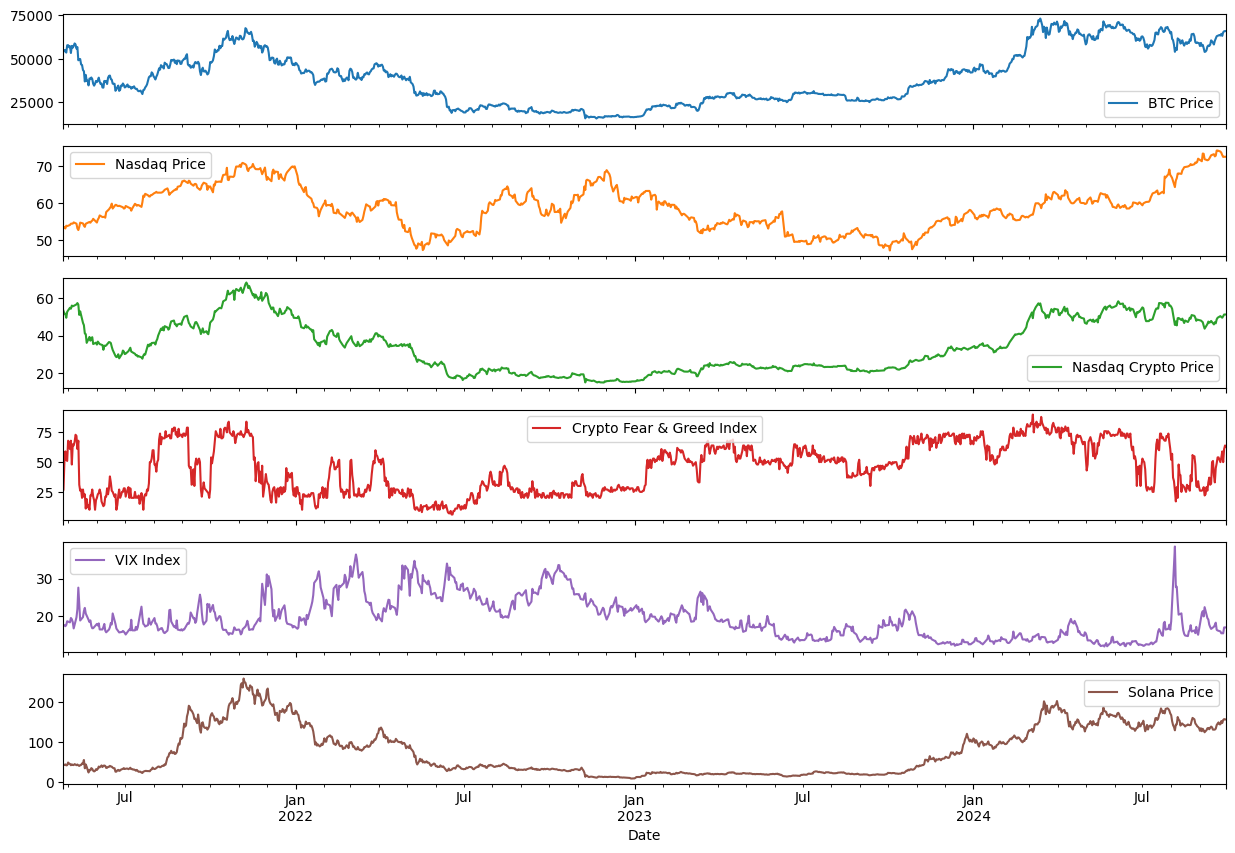

In [46]:
df_feat.plot(subplots=True, figsize=(15, 10))

É possivel ver que existe uma semelhaça entre os indices e moedas em alguns momentos.

In [47]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,54021.753906,53.343334,53.099998,27,17.639999,43.976517
2021-04-27,55033.117188,53.599998,51.660000,50,17.559999,43.239002
2021-04-28,54824.703125,53.216667,51.599998,59,17.280001,44.825985
2021-04-29,53555.109375,53.963333,49.450001,52,17.610001,42.460541
2021-04-30,57750.175781,53.846668,52.650002,51,18.610001,42.956001
...,...,...,...,...,...,...
2024-09-25,63143.144531,73.040001,49.500000,59,15.410000,148.023422
2024-09-26,65181.019531,72.559998,50.290001,50,15.370000,155.576096
2024-09-27,65790.664062,72.599998,51.209999,61,16.959999,157.749939


In [49]:
df_feat.to_csv('df_feat_not_scaled.csv')